# LENDING CLUB CASE STUDY


 ## <font color='blue'>Introduction</font>
 
 >   A very important area of risk analytics of banking and financial services is identifing risky applicants.This case study aims to provide us an idea of implementing EDA to figure out the solution for this problem. we will also develope a basic understanding of risk analytics in banking and financial services. 

## <font color="blue">Business understanding</font>

   >When a company receives a loan application from the applicant, the company has to decide whether to approve it or not based on the applicant's profile.
There are two types of risk involved in it:
>- Approving loan to the applicant, who is not likely to pay, which leads to financial loss.
>- Not approving loan to the applicant, who is likely to pay, which leads to business loss.
>
>when a person applies for a loan, the lender could take two types of decision:
> ### 1.Loan accepted: 
>If the company approves the loan, then there are three possible scenarios:
>- Fully paid - The Customer has fully paid the loan.
>- Current - The customer is in the process of paying the loan. The tenure of the loan is not yet completed.
>- Charged-off - The customer who failed to repay the loan in due time for a long period of time.
>
> ### 2.Loan rejected:
> The company had rejected the loan because the client does not meet the requirement of the loan.


##  <font color="blue">Business objectives
    
>   In order to avoid the credit loss, it is necessary to identify patterns which indicates if a person is likely to default, so that the lenders can take decisions like rejecting the loan, reducing the amount of loan, lending loan with high interest rate, etc. This will ensure that customers who is likely to repay the loan are not rejected.
>
>The company wants to identify the driving factors beyond loan defaults. If they understood the driving factor, they can able to take effective decisions. 

## <font color="blue">Data understanding
    
> ### 1. 'loan.csv'
> It contains all the information about past loan applicants and whether they paid on due time or got defaulted.
>
> ### 2. 'Data_Dictionary.xlsx'
> It is a data dictionary which describes the meaning of the variable.

## <font color="blue">Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import datetime as dt

## <font color="blue">Customizing Settings

In [2]:
# Expanding output display to see all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x:"%.3f" %x)
pd.set_option("display.width", 100)

## <font color="blue">Importing Data

In [3]:
#importing loan data
#As the data contains different dtypes in a same column, allowing to access more memory will avoid future errors
Loan_data = pd.read_csv("loan.csv", low_memory=False, index_col="id")

#importing data dictionary for the reference
Loan_schema = pd.read_excel("Data_Dictionary.xlsx", index_col="LoanStatNew")

In [4]:
# displaying first three rows of loan_data
Loan_data.head(3)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,NaN,May-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.720,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-14,649.910,NaN,May-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN


In [5]:
## displaying first three rows of loan_schema
Loan_schema.head(3)

,Description,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
LoanStatNew,,,,,,,,,,
acc_now_delinq,The number of accounts on which the borrower i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acc_open_past_24mths,Number of trades opened in past 24 months.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
addr_state,The state provided by the borrower in the loan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <font color="blue">Data Handling and Cleaning

### Fixing rows and  columns

In [6]:
#shape of the dataframes
print("shape of loan data   :", Loan_data.shape)
print("shape of loan schema :", Loan_schema.shape)

shape of loan data   : (39717, 110)
shape of loan schema : (117, 10)


In [7]:
#droping all empty columns in loan schema for easy usage
Loan_schema.dropna(how="all", axis=1, inplace=True)
print("After dropping the empty columns, the shape of loan_schema is",Loan_schema.shape)

After dropping the empty columns, the shape of loan_schema is (117, 1)


In [8]:
#deleting empty columns in loan data
Loan_data.dropna(how="all", axis=1,inplace=True)
print("After dropping the empty columns, the shape of loan_data is",Loan_data.shape)

After dropping the empty columns, the shape of loan_data is (39717, 56)


In [9]:
#checking for empty rows in loan data
Loan_data.dropna(how="all", axis=0).shape

(39717, 56)

No empty rows in the dataframe

In [10]:
#checking for duplicate ID in loan data(index)
print("Total unique Id in Loan_data is", Loan_data.index.nunique())
print("Total rows in the Loan_data is",Loan_data.shape[0])

Total unique Id in Loan_data is 39717
Total rows in the Loan_data is 39717


From this data, it is evident that the given dataset has no duplicate rows.

In [11]:
#droping the columns having same values
nunique = Loan_data.nunique()
Loan_data.drop(nunique[nunique==1].index , axis=1, inplace=True)
print("After dropping the columns having same values, the shape is",Loan_data.shape)

After dropping the columns having same values, the shape is (39717, 47)


In [12]:
#droping the columns irrelavant to the study
#we can drop url column, as it contains same host name and path
Loan_data.drop(["url"], axis=1, inplace=True)
#we can drop the rows of Loan status column with category Current, as it is not usefull for our study
Loan_data = Loan_data[-(Loan_data["loan_status"].isin(["Current"]))]
print("After dropping, the shape is",Loan_data.shape)

After dropping, the shape is (38577, 46)


In [13]:
#cleaning columns name
Loan_data.columns = Loan_data.columns.str.strip().str.capitalize()
Loan_schema.index = Loan_schema.index.str.strip().str.capitalize()
Loan_data.index.name = "Id"
Loan_data.head(2)

,Member_id,Loan_amnt,Funded_amnt,Funded_amnt_inv,Term,Int_rate,Installment,Grade,Sub_grade,Emp_title,Emp_length,Home_ownership,Annual_inc,Verification_status,Issue_d,Loan_status,Desc,Purpose,Title,Zip_code,Addr_state,Dti,Delinq_2yrs,Earliest_cr_line,Inq_last_6mths,Mths_since_last_delinq,Mths_since_last_record,Open_acc,Pub_rec,Revol_bal,Revol_util,Total_acc,Out_prncp,Out_prncp_inv,Total_pymnt,Total_pymnt_inv,Total_rec_prncp,Total_rec_int,Total_rec_late_fee,Recoveries,Collection_recovery_fee,Last_pymnt_d,Last_pymnt_amnt,Next_pymnt_d,Last_credit_pull_d,Pub_rec_bankruptcies
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,NaN,May-16,0.000
1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000


### Missing Value Treatment

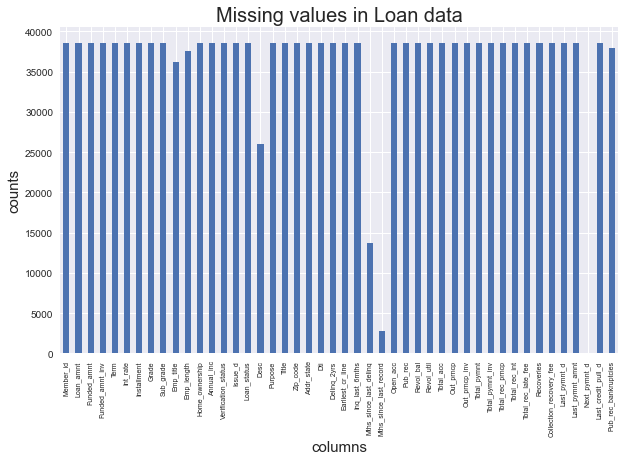

In [14]:
#plotting missing values in loan data
plt.style.use("seaborn")
plt.figure(figsize=(10,6))
Loan_data.count().plot.bar()
plt.xticks(rotation=90,fontsize=7)
plt.title("Missing values in Loan data",fontsize=20)
plt.xlabel("columns", fontsize=15)
plt.ylabel("counts",fontsize=15)
plt.show()

#### Inference from the plot:

> Three columns from the dataset contains missing values more than 50%, thus need to drop the column.

#### Columns with missing values more than 50%:

The columns Mths_since_last_record,Mths_since_last_delinq, Next_pymnt_d have missing values more than 50%.

#### Suggestion:

>We can drop the columns Mths_since_last_record, Mths_since_last_delinq, Next_pymnt_d.

In [15]:
#dropping the columns having missing value more than 50%
Loan_data.drop(["Mths_since_last_record","Mths_since_last_delinq","Next_pymnt_d"], axis=1, inplace=True)
Loan_data.shape

(38577, 43)

#### Cleaning Desc column:

In [16]:
print("Total number of missing values in Desc column are",Loan_data["Desc"].isnull().sum())

Total number of missing values in Desc column are 12527


#### Suggestion:

>We can drop the Desc column, as it contains more missing values.

In [17]:
#dropping "Desc" column
Loan_data.drop("Desc", axis=1, inplace=True)

#### Cleaning the columns Emp_title and Emp_length:

In [18]:
print("Missing values in Emp_title column are", Loan_data["Emp_title"].isnull().sum())
print("Missing values in Emp_length column are", Loan_data["Emp_length"].isnull().sum())

Missing values in Emp_title column are 2386
Missing values in Emp_length column are 1033


#### Suggestion:
>As the columns Emp_title and Emp_length are key variables for the study, we can drop the missing value rows.

In [19]:
#droping rows having nan values in "Emp_title" column
Loan_data = Loan_data[-(Loan_data["Emp_title"].isnull())]

In [20]:
#droping rows having nan values in "Emp_length" column
Loan_data = Loan_data[-(Loan_data["Emp_length"].isnull())]

#### Cleaning the Revol_util column:

In [21]:
print("Missing values in Revol_util column are", Loan_data["Revol_util"].isnull().sum())

Missing values in Revol_util column are 46


#### suggestion:
> We can fill the mode value in the place of missing values.

In [22]:
Loan_data["Revol_util"].value_counts()

0%        863
0.20%      59
63%        58
70.40%     55
64.80%     54
         ... 
26.32%      1
33.29%      1
16.02%      1
37.73%      1
33.39%      1
Name: Revol_util, Length: 1081, dtype: int64

In [23]:
#filling the missing values with mode value
Loan_data["Revol_util"].fillna(Loan_data["Revol_util"].mode()[0], inplace=True)

#### Cleaning the Title column:

In [24]:
print("Missing values in Title column are", Loan_data["Title"].isnull().sum())

Missing values in Title column are 9


#### Suggestion:
> We can fill the mode value in the place of missing values.

In [25]:
Loan_data["Title"].value_counts()

Debt Consolidation                      2000
Debt Consolidation Loan                 1549
Personal Loan                            614
Consolidation                            475
debt consolidation                       446
                                        ... 
Need capital to fund unique web site       1
pal                                        1
Pool repairs                               1
MAKE ON PAYMENT                            1
Home Impovement                            1
Name: Title, Length: 18099, dtype: int64

In [26]:
#filling the missing value with mode value
Loan_data["Title"].fillna(Loan_data["Title"].mode()[0], inplace=True)

#### Cleaning the Last_pymnt_d column:

In [27]:
print("Missing values in Last_pymnt_d column are", Loan_data["Last_pymnt_d"].isnull().sum())

Missing values in Last_pymnt_d column are 64


#### Suggestion:
> We can fill the mode value in the place of missing values.

In [28]:
#cleaning "Last_pymnt_d" column
Loan_data["Last_pymnt_d"].value_counts()

Mar-13    969
Dec-14    876
May-13    857
Feb-13    817
Mar-12    800
         ... 
Apr-08     10
Jun-08     10
Mar-08      5
Jan-08      2
Feb-08      1
Name: Last_pymnt_d, Length: 101, dtype: int64

In [29]:
#filling missing values with mode value
Loan_data["Last_pymnt_d"].fillna(Loan_data["Last_pymnt_d"].mode()[0],inplace=True)

#### Cleaning the Pub_rec_bankruptcies column:

In [30]:
print("Missing values in Pub_rec_bankruptcies column are", Loan_data["Pub_rec_bankruptcies"].isnull().sum())

Missing values in Pub_rec_bankruptcies column are 654


#### suggestion:
> We can fill the mode value in the place of missing values.

In [31]:
Loan_data["Pub_rec_bankruptcies"].value_counts()

0.000    34006
1.000     1471
2.000        5
Name: Pub_rec_bankruptcies, dtype: int64

In [32]:
#cleaning "Pub_rec_bankruptcies" column
Loan_data["Pub_rec_bankruptcies"].fillna(Loan_data["Pub_rec_bankruptcies"].mode()[0], inplace=True)
print("The final shape of the loan data after dropping all the unnecessary rows and columns is",Loan_data.shape)

The final shape of the loan data after dropping all the unnecessary rows and columns is (36136, 42)


In [81]:
#Checking missing values count
print("After cleaning the number of missing values in the dataset is",Loan_data.isnull().sum().sum())

After cleaning the number of missing values in the dataset is 0


### Handling Incorrect Data Types

In [34]:
#some columns data types needs to be changed
Loan_data.dtypes

Member_id                    int64
Loan_amnt                    int64
Funded_amnt                  int64
Funded_amnt_inv            float64
Term                        object
Int_rate                    object
Installment                float64
Grade                       object
Sub_grade                   object
Emp_title                   object
Emp_length                  object
Home_ownership              object
Annual_inc                 float64
Verification_status         object
Issue_d                     object
Loan_status                 object
Purpose                     object
Title                       object
Zip_code                    object
Addr_state                  object
Dti                        float64
Delinq_2yrs                  int64
Earliest_cr_line            object
Inq_last_6mths               int64
Open_acc                     int64
Pub_rec                      int64
Revol_bal                    int64
Revol_util                  object
Total_acc           

In [35]:
Loan_data["Term"].value_counts()

 36 months    27125
 60 months     9011
Name: Term, dtype: int64

In [36]:
#cleaning "Term" column
Loan_data["Term"] = Loan_data["Term"].apply(lambda x:int(x.strip("months")))

In [37]:
Loan_data["Term"].dtypes

dtype('int64')

In [38]:
#renaming "Term" column name as "Term_mnths" in order to identify the column as month
Loan_data.rename(columns={"Term":"Term_mnths"}, inplace=True)

In [39]:
Loan_data["Int_rate"].value_counts()

10.99%    862
11.49%    739
7.51%     732
13.49%    711
7.88%     674
         ... 
17.46%      1
13.84%      1
17.44%      1
16.20%      1
15.01%      1
Name: Int_rate, Length: 368, dtype: int64

In [40]:
#cleaning int_rate column
Loan_data["Int_rate"] = Loan_data["Int_rate"].apply(lambda x:float(x.strip("%")))

In [41]:
Loan_data["Int_rate"].dtypes

dtype('float64')

In [42]:
Loan_data["Emp_length"].value_counts()

10+ years    8156
2 years      4178
< 1 year     4127
3 years      3901
4 years      3266
5 years      3091
1 year       3067
6 years      2099
7 years      1663
8 years      1391
9 years      1197
Name: Emp_length, dtype: int64

#### Assumption:

>As already 1 year category present in the "Emp_length" column, lets assume <1 year as 0 year. 

In [43]:
#Assuming and replacing <1 year as 0 year and 10+ years as 10 years
Loan_data["Emp_length"].replace({"< 1 year":"0 year","10+ years":"10 years"},inplace=True)

In [44]:
#cleaning Emp_length
Loan_data["Emp_length"] = Loan_data.Emp_length.str.extract("(^\d+)").astype("float")

In [45]:
Loan_data["Emp_length"].dtypes

dtype('float64')

In [46]:
Loan_data["Revol_util"].value_counts()

0%        909
0.20%      59
63%        58
70.40%     55
64.80%     54
         ... 
26.32%      1
33.29%      1
16.02%      1
37.73%      1
33.39%      1
Name: Revol_util, Length: 1081, dtype: int64

In [47]:
#cleaning revol utilization column
Loan_data["Revol_util"] = Loan_data["Revol_util"].astype(str).apply(lambda x:float(x.rstrip("%")))

In [48]:
Loan_data["Revol_util"].dtypes

dtype('float64')

In [49]:
#converting all dates from string to datetime format
Loan_data["Issue_d"] = pd.to_datetime(Loan_data["Issue_d"], format ="%b-%y")
Loan_data["Earliest_cr_line"] = pd.to_datetime(Loan_data["Earliest_cr_line"], format ="%b-%y")
Loan_data["Last_pymnt_d"] = pd.to_datetime(Loan_data["Last_pymnt_d"], format ="%b-%y")
Loan_data["Last_credit_pull_d"] = pd.to_datetime(Loan_data["Last_credit_pull_d"], format ="%b-%y")

In [50]:
Loan_data["Earliest_cr_line"].sort_values()

Id
107136    1969-02-01
454092    1969-02-01
1057384   1969-03-01
781693    1969-03-01
474431    1969-03-01
             ...    
990789    2068-08-01
1042802   2068-09-01
879876    2068-09-01
383364    2068-10-01
647976    2068-12-01
Name: Earliest_cr_line, Length: 36136, dtype: datetime64[ns]

The "Earliest_cr_line" contains years less than 1968. python datetime library interprets year less than 1968 as 2068, thus we need to correct that.

In [51]:
#writing function to correct the datetime
def fix_date(x):
    if x.year >= 2012:
        year = x.year - 100
    else:
        year = x.year
    return dt.date(year,x.month,x.day)

In [52]:
#cleaning "Earliest_cr_line" column
Loan_data["Earliest_cr_line"] = Loan_data["Earliest_cr_line"].apply(fix_date).astype("datetime64")

In [53]:
Loan_data["Earliest_cr_line"].sort_values()

Id
771203    1946-01-01
751959    1950-12-01
634940    1954-11-01
772702    1956-09-01
816677    1962-09-01
             ...    
1039102   2008-09-01
989257    2008-09-01
982285    2008-09-01
1028850   2008-10-01
1063003   2008-11-01
Name: Earliest_cr_line, Length: 36136, dtype: datetime64[ns]

In [82]:
#checking the data types of all the columns
Loan_data.dtypes

Member_id                           int64
Loan_amnt                           int64
Funded_amnt                         int64
Funded_amnt_inv                   float64
Term_mnths                          int64
Int_rate                          float64
Installment                       float64
Grade                              object
Sub_grade                          object
Emp_title                          object
Emp_length                        float64
Home_ownership                     object
Annual_inc                        float64
Verification_status                object
Issue_d                    datetime64[ns]
Loan_status                        object
Purpose                            object
Title                              object
Zip_code                           object
Addr_state                         object
Dti                               float64
Delinq_2yrs                         int64
Earliest_cr_line           datetime64[ns]
Inq_last_6mths                    

## Sanity checks

#### The Funded amount should not be more than Loan amount

In [55]:
Loan_data[Loan_data["Loan_amnt"] < Loan_data["Funded_amnt"]]

,Member_id,Loan_amnt,Funded_amnt,Funded_amnt_inv,Term_mnths,Int_rate,Installment,Grade,Sub_grade,Emp_title,Emp_length,Home_ownership,Annual_inc,Verification_status,Issue_d,Loan_status,Purpose,Title,Zip_code,Addr_state,Dti,Delinq_2yrs,Earliest_cr_line,Inq_last_6mths,Open_acc,Pub_rec,Revol_bal,Revol_util,Total_acc,Out_prncp,Out_prncp_inv,Total_pymnt,Total_pymnt_inv,Total_rec_prncp,Total_rec_int,Total_rec_late_fee,Recoveries,Collection_recovery_fee,Last_pymnt_d,Last_pymnt_amnt,Last_credit_pull_d,Pub_rec_bankruptcies
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


All the funded amount is less than loan amount

#### The Funded amount by investors should not be more than funded amount

In [56]:
Loan_data[Loan_data["Funded_amnt"] < Loan_data["Funded_amnt_inv"]]

,Member_id,Loan_amnt,Funded_amnt,Funded_amnt_inv,Term_mnths,Int_rate,Installment,Grade,Sub_grade,Emp_title,Emp_length,Home_ownership,Annual_inc,Verification_status,Issue_d,Loan_status,Purpose,Title,Zip_code,Addr_state,Dti,Delinq_2yrs,Earliest_cr_line,Inq_last_6mths,Open_acc,Pub_rec,Revol_bal,Revol_util,Total_acc,Out_prncp,Out_prncp_inv,Total_pymnt,Total_pymnt_inv,Total_rec_prncp,Total_rec_int,Total_rec_late_fee,Recoveries,Collection_recovery_fee,Last_pymnt_d,Last_pymnt_amnt,Last_credit_pull_d,Pub_rec_bankruptcies
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


All the funded amount by investors is less than funded amount

#### The overall amount to be paid should not be less than funded amount with some interests

Amount to be paid = (Term months * Installment)

In [57]:
Loan_data[(Loan_data["Installment"] * Loan_data["Term_mnths"]) < (Loan_data["Funded_amnt"])]

,Member_id,Loan_amnt,Funded_amnt,Funded_amnt_inv,Term_mnths,Int_rate,Installment,Grade,Sub_grade,Emp_title,Emp_length,Home_ownership,Annual_inc,Verification_status,Issue_d,Loan_status,Purpose,Title,Zip_code,Addr_state,Dti,Delinq_2yrs,Earliest_cr_line,Inq_last_6mths,Open_acc,Pub_rec,Revol_bal,Revol_util,Total_acc,Out_prncp,Out_prncp_inv,Total_pymnt,Total_pymnt_inv,Total_rec_prncp,Total_rec_int,Total_rec_late_fee,Recoveries,Collection_recovery_fee,Last_pymnt_d,Last_pymnt_amnt,Last_credit_pull_d,Pub_rec_bankruptcies
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


The overall amount to be paid is not less than the funded amount with some interests

#### The customer applying for the loan for the purpose of debt consolidation should not have dept-to-income ratio as zero.

In [58]:
Loan_data[(Loan_data["Purpose"].str.contains("debt_consolidation")) & (Loan_data["Dti"]==0)].head(2)

,Member_id,Loan_amnt,Funded_amnt,Funded_amnt_inv,Term_mnths,Int_rate,Installment,Grade,Sub_grade,Emp_title,Emp_length,Home_ownership,Annual_inc,Verification_status,Issue_d,Loan_status,Purpose,Title,Zip_code,Addr_state,Dti,Delinq_2yrs,Earliest_cr_line,Inq_last_6mths,Open_acc,Pub_rec,Revol_bal,Revol_util,Total_acc,Out_prncp,Out_prncp_inv,Total_pymnt,Total_pymnt_inv,Total_rec_prncp,Total_rec_int,Total_rec_late_fee,Recoveries,Collection_recovery_fee,Last_pymnt_d,Last_pymnt_amnt,Last_credit_pull_d,Pub_rec_bankruptcies
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1008627,1235314,6500,6500,6500.000,36,10.650,211.730,B,B2,Donovan Hatem LLP,2.000,MORTGAGE,56650.000,Not Verified,2011-11-01,Fully Paid,debt_consolidation,Loan Consolidation,021xx,MA,0.000,0,1998-10-01,2,2,0,0,0.000,7,0.000,0.000,7267.225,7267.220,6500.000,767.220,0.000,0.000,0.000,2013-04-01,1687.680,2014-10-01,0.000
1001046,1226814,5150,5150,5150.000,36,7.900,161.150,A,A4,Walmart Information Systems Division,7.000,RENT,68000.000,Verified,2011-11-01,Fully Paid,debt_consolidation,Debt Consolidation 2011,727xx,AR,0.000,0,1997-09-01,2,6,0,0,0.000,10,0.000,0.000,5801.190,5801.190,5150.000,651.190,0.000,0.000,0.000,2014-11-01,165.120,2016-04-01,0.000


There are 25 customers who have zero dept-to-income ratio but applied for debt consolidation loan, which is suspicious, thus we can drop the records

In [59]:
Loan_data = Loan_data[-((Loan_data["Purpose"].str.contains("debt_consolidation")) & (Loan_data["Dti"]==0))]
Loan_data.shape

(36111, 42)

#### The number of open accounts in  borrower's credit file should not be greater than total accounts in his credit file

In [60]:
Loan_data[Loan_data["Open_acc"] > Loan_data["Total_acc"]]

,Member_id,Loan_amnt,Funded_amnt,Funded_amnt_inv,Term_mnths,Int_rate,Installment,Grade,Sub_grade,Emp_title,Emp_length,Home_ownership,Annual_inc,Verification_status,Issue_d,Loan_status,Purpose,Title,Zip_code,Addr_state,Dti,Delinq_2yrs,Earliest_cr_line,Inq_last_6mths,Open_acc,Pub_rec,Revol_bal,Revol_util,Total_acc,Out_prncp,Out_prncp_inv,Total_pymnt,Total_pymnt_inv,Total_rec_prncp,Total_rec_int,Total_rec_late_fee,Recoveries,Collection_recovery_fee,Last_pymnt_d,Last_pymnt_amnt,Last_credit_pull_d,Pub_rec_bankruptcies
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
127213,85483,2000,2000,1575.000,36,7.120,61.870,A,A1,U.S. Government,10.000,MORTGAGE,118000.000,Not Verified,2007-09-01,Fully Paid,debt_consolidation,consolidate debt,020xx,MA,0.430,0,1991-06-01,0,14,0,4709,18.500,8,0.000,0.000,2219.433,1747.800,2000.000,219.430,0.000,0.000,0.000,2010-04-01,3.060,2010-04-01,0.000


In this row, total number of open credit lines in borrower's credit file is more than the total credit lines in borrower's current credit file. This row is suspicious thus we can drop it.

In [61]:
Loan_data = Loan_data[-(Loan_data["Open_acc"] > Loan_data["Total_acc"])]
Loan_data.shape

(36110, 42)

#### The remaining oustanding principal amount to be paid by the customer should be zero if their loan status is "fully paid"

In [62]:
Loan_data[(Loan_data["Out_prncp"]!=0) & (Loan_data["Loan_status"]=="Fully Paid")]

,Member_id,Loan_amnt,Funded_amnt,Funded_amnt_inv,Term_mnths,Int_rate,Installment,Grade,Sub_grade,Emp_title,Emp_length,Home_ownership,Annual_inc,Verification_status,Issue_d,Loan_status,Purpose,Title,Zip_code,Addr_state,Dti,Delinq_2yrs,Earliest_cr_line,Inq_last_6mths,Open_acc,Pub_rec,Revol_bal,Revol_util,Total_acc,Out_prncp,Out_prncp_inv,Total_pymnt,Total_pymnt_inv,Total_rec_prncp,Total_rec_int,Total_rec_late_fee,Recoveries,Collection_recovery_fee,Last_pymnt_d,Last_pymnt_amnt,Last_credit_pull_d,Pub_rec_bankruptcies
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


All the fully paid customers do not have any remaining outstanding principal amount to be paid.

### Categorical data cleaning

In [63]:
#Extracting categorical variables from dataset and naming as "Cat_Loan_data"
Cat_Loan_data = Loan_data.select_dtypes(exclude=[np.number])
#Extracting numeric variables from dataset and naming as "Num_Loan_data"
Num_Loan_data = Loan_data.select_dtypes(include=[np.number])

>Cat_Loan_data  =  Categorical columns of loan data
>
>Num_Loan_data  =  Numerical columns of loan data

In [64]:
Cat_Loan_data.head(2)

,Grade,Sub_grade,Emp_title,Home_ownership,Verification_status,Issue_d,Loan_status,Purpose,Title,Zip_code,Addr_state,Earliest_cr_line,Last_pymnt_d,Last_credit_pull_d
Id,,,,,,,,,,,,,,
1077430,C,C4,Ryder,RENT,Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1999-04-01,2013-04-01,2013-09-01
1076863,C,C1,AIR RESOURCES BOARD,RENT,Source Verified,2011-12-01,Fully Paid,other,personel,917xx,CA,1996-02-01,2015-01-01,2016-04-01


#### Cleaning Emp_title column

In [65]:
print("The unique count of Emp title column is", Loan_data["Emp_title"].nunique())
Loan_data["Emp_title"].value_counts().head(10)

The unique count of Emp title column is 27964


US Army              131
Bank of America      107
IBM                   65
AT&T                  57
Kaiser Permanente     56
UPS                   52
Wells Fargo           52
US Air Force          51
USAF                  51
Walmart               45
Name: Emp_title, dtype: int64

The employment title have more number of duplicates, thus we need to reduplicate the values.

In [66]:
#replacing the symbols in the Emp title column
Loan_data["Emp_title"] = Loan_data["Emp_title"].apply(lambda x:x.strip().replace(",","").replace(".","").replace("&","and").replace("-"," ").replace("'","").replace(" ","").lower())
#replacing dublicate values
Loan_data["Emp_title"].replace({"unitedstatesairforce":"usairforce","unitedstatesarmy":"usarmy","self":"selfemployed","unitedstatespostalservice":"uspostalservice","usaf":"usairforce","unitedstatesnavy":"usnavy"}, inplace =True)
print("After cleaning, the unique count of Employment title column becomes",Loan_data["Emp_title"].nunique())
Loan_data["Emp_title"].value_counts().head(10)

After cleaning, the unique count of Employment title column becomes 25623


usarmy             296
usairforce         174
selfemployed       154
bankofamerica      134
walmart            112
uspostalservice    110
jpmorganchase       90
atandt              88
usnavy              81
wellsfargo          71
Name: Emp_title, dtype: int64

Removed spaces,commas,etc and uncapitalized the Employment title column, thus merged around 2264 duplicates in employment title column

#### Cleaning title column

In [67]:
print("the unique values of the title column is",Loan_data["Title"].nunique())
Loan_data["Title"].value_counts().head(10)

the unique values of the title column is 18088


Debt Consolidation           2007
Debt Consolidation Loan      1547
Personal Loan                 614
Consolidation                 475
debt consolidation            446
Credit Card Consolidation     332
Home Improvement              327
Debt consolidation            307
Personal                      283
Credit Card Loan              280
Name: Title, dtype: int64

The title have more number of duplicates, thus we need to reduplicate the values.

In [68]:
Loan_data["Title"] = Loan_data["Title"].apply(lambda x:x.lower().replace("_"," ").strip())
#converting all credit card reasons in title column as credit card
Loan_data.loc[Loan_data["Title"].str.contains("credit card"), "Title"] = "credit card"
#converting all education reasons in title column as education
Loan_data.loc[Loan_data["Title"].str.contains("education"), "Title"] = "education"
#converting all personal loan reasons in title column as personal
Loan_data.loc[Loan_data["Title"].str.contains("personal"), "Title"] = "personal"
#converting all home reasons in title column as home
Loan_data.loc[Loan_data["Title"].str.contains("home"), "Title"] = "home"
#removing loan from the end
Loan_data["Title"] = Loan_data["Title"].apply(lambda x:x.replace("loan","").replace("dept","debt").strip())
#converting all dept reasons in title column as dept consolidation
Loan_data.loc[Loan_data["Title"].str.contains("debt"), "Title"] = "debt consolidation"
Loan_data["Title"].value_counts().head(50)

#some rows with having value only "loan" is replaced with space,while cleaning the title column
#thus replacing those with mode values.
Loan_data["Title"] = Loan_data["Title"].apply(lambda x:"dept consolidation" if x=="" else x)
print("After almost cleaning, the unique count becomes ",Loan_data["Title"].nunique())
Loan_data["Title"].value_counts().head(10)

After almost cleaning, the unique count becomes  11171


debt consolidation    8341
credit card           3765
personal              1907
home                  1734
consolidation         1086
wedding                419
small business         316
car                    301
dept consolidation     291
other                  227
Name: Title, dtype: int64

Reduplicated the title column, thus merged around 6918 duplicates in title column

### Outliers analysis

In [69]:
Loan_data.describe()

,Member_id,Loan_amnt,Funded_amnt,Funded_amnt_inv,Term_mnths,Int_rate,Installment,Emp_length,Annual_inc,Dti,Delinq_2yrs,Inq_last_6mths,Open_acc,Pub_rec,Revol_bal,Revol_util,Total_acc,Out_prncp,Out_prncp_inv,Total_pymnt,Total_pymnt_inv,Total_rec_prncp,Total_rec_int,Total_rec_late_fee,Recoveries,Collection_recovery_fee,Last_pymnt_amnt,Pub_rec_bankruptcies
count,36110.000,36110.000,36110.000,36110.000,36110.000,36110.000,36110.000,36110.000,36110.000,36110.000,36110.000,36110.000,36110.000,36110.000,36110.000,36110.000,36110.000,36110.000,36110.000,36110.000,36110.000,36110.000,36110.000,36110.000,36110.000,36110.000,36110.000,36110.000
mean,841159.367,11105.825,10842.131,10270.288,41.988,11.969,323.875,4.963,69045.534,13.363,0.147,0.871,9.328,0.054,13358.693,49.000,22.140,0.000,0.000,11964.145,11356.655,9725.107,2141.128,1.345,96.565,12.259,2784.073,0.041
std,264776.846,7313.945,7060.203,6993.577,10.385,3.685,207.270,3.541,64634.119,6.640,0.495,1.068,4.394,0.235,15723.940,28.274,11.411,0.000,0.000,8794.575,8687.062,6987.418,2394.961,7.256,694.264,143.487,4500.267,0.199
min,70699.000,500.000,500.000,0.000,36.000,5.420,16.080,0.000,4000.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,660637.750,5500.000,5400.000,5000.000,36.000,9.010,167.710,2.000,41000.000,8.270,0.000,0.000,6.000,0.000,3747.250,25.700,14.000,0.000,0.000,5585.806,5111.590,4650.000,657.535,0.000,0.000,0.000,222.280,0.000
50%,837044.500,10000.000,9600.000,8875.000,36.000,11.830,280.375,4.000,60000.000,13.470,0.000,1.000,9.000,0.000,8903.000,49.500,20.000,0.000,0.000,9814.775,9201.045,8000.000,1327.445,0.000,0.000,0.000,590.935,0.000
75%,1036299.750,15000.000,15000.000,14011.462,36.000,14.420,426.470,9.000,82006.000,18.610,0.000,1.000,12.000,0.000,17043.000,72.500,29.000,0.000,0.000,16239.038,15439.075,13250.000,2706.602,0.000,0.000,0.000,3544.838,0.000
max,1314167.000,35000.000,35000.000,35000.000,60.000,24.400,1305.190,10.000,6000000.000,29.990,11.000,8.000,44.000,4.000,149588.000,99.900,90.000,0.000,0.000,58563.680,58563.680,35000.020,23563.680,180.200,29623.350,7002.190,36115.200,2.000


#### Detail inferred from the statistical data

> If the difference between mean and median is so large(without having more number of zero values in the column), then it is evident that the column has outliers.
>
> From the above details, the "Annual_inc" column contains outliers.

#### Checking "Annual_inc" column

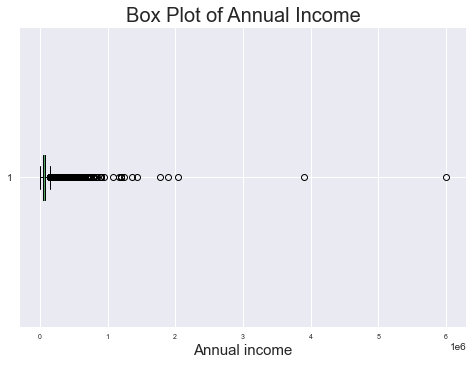

In [70]:
plt.boxplot(Loan_data["Annual_inc"], vert=False)
plt.xticks(rotation=0,fontsize=7)
plt.title("Box Plot of Annual Income",fontsize=20)
plt.xlabel("Annual income",fontsize=15)
plt.show()

From the box plot it is clearly evident that the annual income column has outliers. These outliers will leads to a biased inference, thus we need to remove these outliers.

#### suggestion:
> We can drop the rows with annual income more than 06 lakh

In [71]:
#dropping rows with annual income more than 06 lakh
Loan_data = Loan_data[-(Loan_data["Annual_inc"]>600000)]
Loan_data.shape

(36065, 42)

## <font color="blue">Data Visualization

### Univariate analysis

In [72]:
Cat_Loan_data.head(2)

,Grade,Sub_grade,Emp_title,Home_ownership,Verification_status,Issue_d,Loan_status,Purpose,Title,Zip_code,Addr_state,Earliest_cr_line,Last_pymnt_d,Last_credit_pull_d
Id,,,,,,,,,,,,,,
1077430,C,C4,Ryder,RENT,Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1999-04-01,2013-04-01,2013-09-01
1076863,C,C1,AIR RESOURCES BOARD,RENT,Source Verified,2011-12-01,Fully Paid,other,personel,917xx,CA,1996-02-01,2015-01-01,2016-04-01


In [73]:
Num_Loan_data.head(2)

,Member_id,Loan_amnt,Funded_amnt,Funded_amnt_inv,Term_mnths,Int_rate,Installment,Emp_length,Annual_inc,Dti,Delinq_2yrs,Inq_last_6mths,Open_acc,Pub_rec,Revol_bal,Revol_util,Total_acc,Out_prncp,Out_prncp_inv,Total_pymnt,Total_pymnt_inv,Total_rec_prncp,Total_rec_int,Total_rec_late_fee,Recoveries,Collection_recovery_fee,Last_pymnt_amnt,Pub_rec_bankruptcies
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077430,1314167,2500,2500,2500.000,60,15.270,59.830,0.000,30000.000,1.000,0,5,3,0,1687,9.400,4,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,119.660,0.000
1076863,1277178,10000,10000,10000.000,36,13.490,339.310,10.000,49200.000,20.000,0,1,10,0,5598,21.000,37,0.000,0.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,357.480,0.000


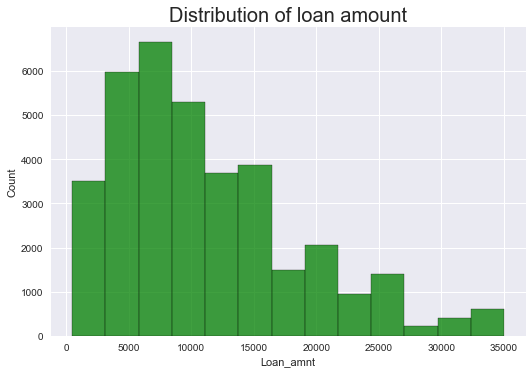

In [74]:
#plotting distribution plot for loan amount
sns.displot(data=Loan_data, x="Loan_amnt", bins=13, color="g",height=5, aspect=1.5)
plt.title("Distribution of loan amount",fontsize=20)
plt.show()

#### Point to infer from the graph

> The majority loan amount provided to the customer is inbetween 5000 and 10000.

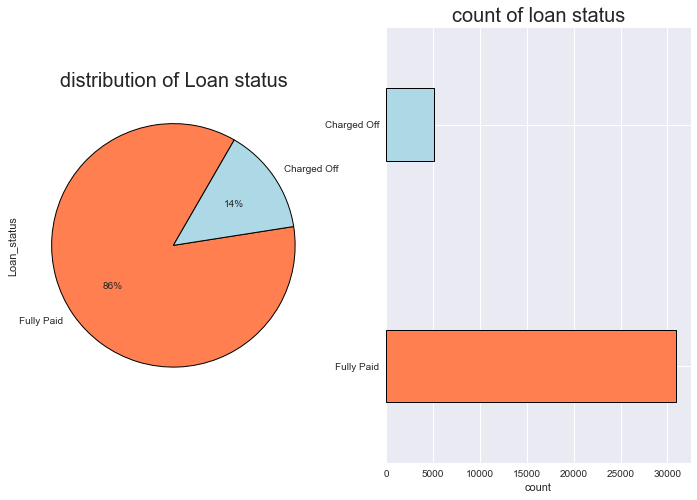

In [75]:
plt.figure(figsize=[12,8])
#plotting a pie chart for Loan status column
plt.subplot(1,2,1)
Loan_data["Loan_status"].value_counts().plot.pie(autopct="%1.0f%%", startangle=60, colors=["coral","lightblue"],wedgeprops={"linewidth":1, "edgecolor":"k"})
plt.title("distribution of Loan status", fontsize=20)

#plotting a horizontal bar chart for Loan status column
plt.subplot(1,2,2)
Loan_data["Loan_status"].value_counts().plot.barh(width=0.3, color=["coral","lightblue"],linewidth=1, edgecolor="k")
plt.title("count of loan status", fontsize=20)
plt.xlabel("count")
plt.show()

#### Point to infer from the graph

> Among the total client population approximately 14% of people facing difficulties in repaying the loan.

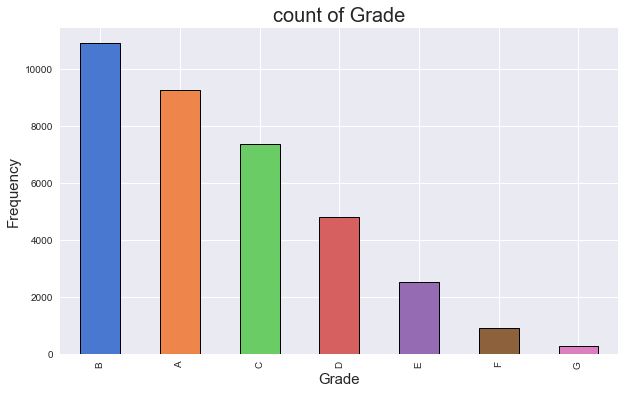

In [76]:
#plotting a horizontal bar chart for Grade column
plt.figure(figsize=[10,6])
Loan_data["Grade"].value_counts().plot.bar(width=0.5, color=sns.color_palette("muted",7),linewidth=1, edgecolor="k")
plt.title("count of Grade", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Grade",fontsize=15)
plt.show()

#### Point to infer from the graph

> More number of loans were approved for grade B applicants with minimum approval for grade G applicants.

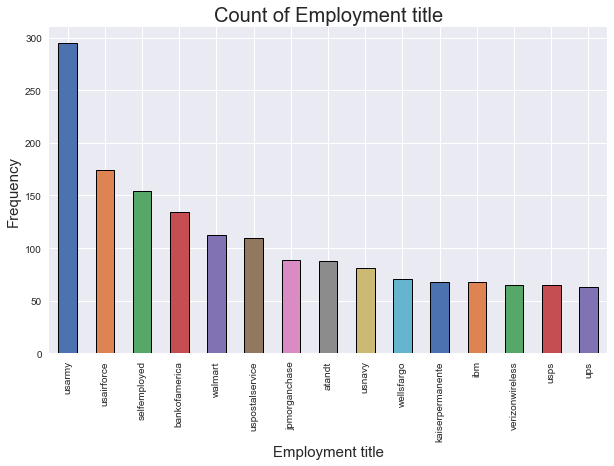

In [77]:
plt.figure(figsize=[10,6])
Loan_data["Emp_title"].value_counts().head(15).plot.bar(color=sns.color_palette("deep"),linewidth=1,edgecolor="k")
plt.title("Count of Employment title", fontsize=20)
plt.xlabel("Employment title",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

#### Point to infer from the graph

> Most of the applicants were from US Army